In [6]:
# Simula una muestra eps de tamaño n = 500 de una distribución normal con media 0 y desviación típica 1, y una muestra
# x de tamaño n = 500 de una distribución uniforme [0,200]
# Construye las muestras y1 = 100 + 200·x + eps·x, y2 = 100 + 200·x + eps
# a) Obtén un modelo de regresión lineal Y = b0 + b1·X + error para Y1 e Y2 y representa gráficamente los residuos.
# b) Realiza la prueba de Breusch - Pagan para cada uno de los modelos.

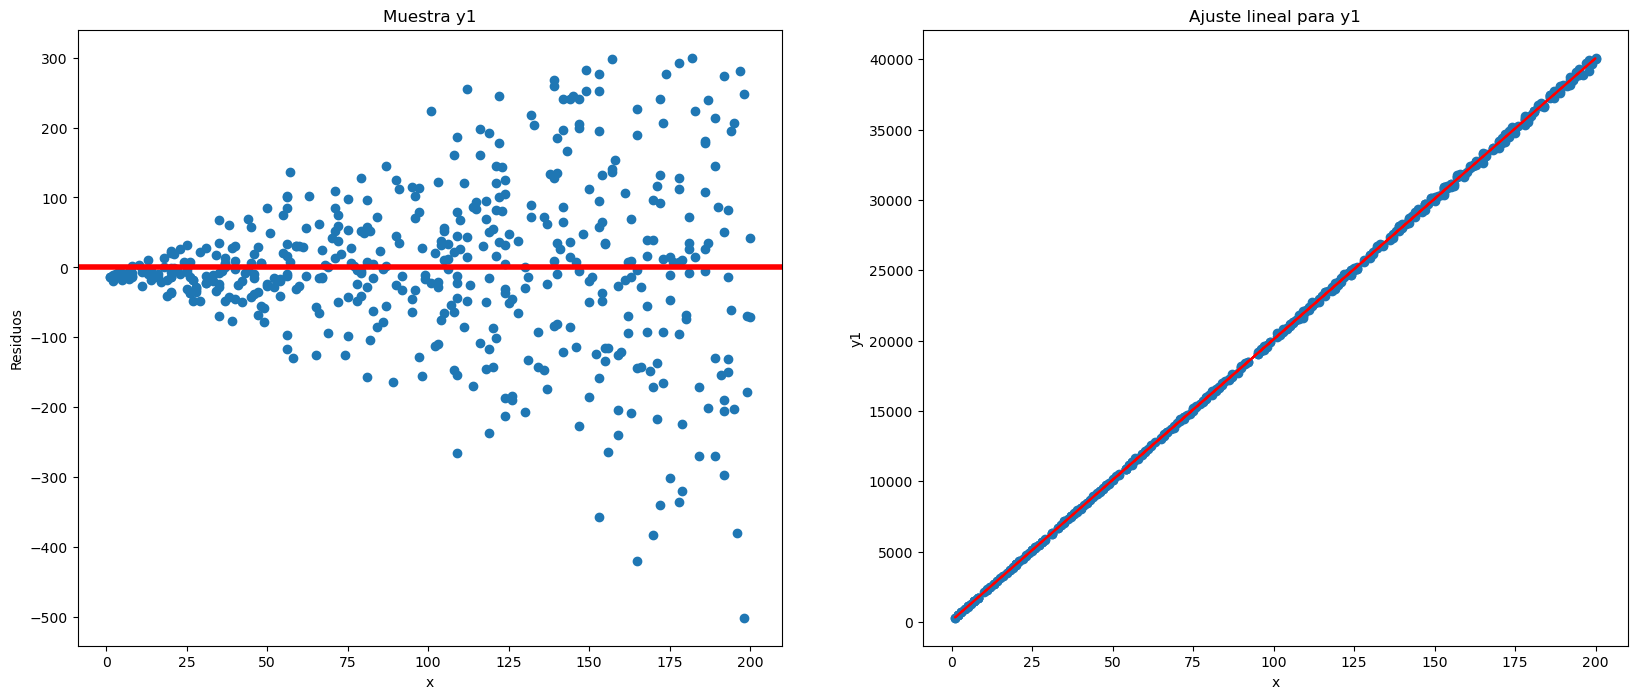

In [8]:
# Apartado a)
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Semilla
np.random.seed(seed=11)

# Muestras originales
eps = np.random.normal(0,1,500)
x = np.random.randint(0,201,500)

# Nuevas muestras
y1 = 100 + 200 * x + eps * x
y2 = 100 + 200 * x + eps

# Para la regresión lineal se requiere importar el módulo linear_model, contenido en sklearn.
x = x.reshape((-1,1)) # Genera un array de arrays donde cada uno tiene un solo elemento. Es parecido a trasponer. Se necesita para el ajuste lineal 
                      # con LinearRegression

# Muestra y1
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(x,y1) # Ajuste lineal
y1_pred = model1.predict(x) # Valores teóricos según el modelo
residuos1 = y1 - y1_pred

# Muestra y2
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(x,y2)
y2_pred = model2.predict(x)
residuos2 = y2 - y2_pred

# Representación de los resultados para la muestra y1
# La representación de la dispersión de residuos se hace con pyplot
plt.subplot(121)
plt.scatter(x, residuos1)
plt.axhline(0, color='red', linewidth=4) # Línea horizontal en residuos = 0
plt.xlabel('x')
plt.ylabel('Residuos')
plt.title('Muestra y1')

plt.subplot(122)
plt.plot(x,y1_pred,'r')
plt.scatter(x,y1)
plt.xlabel('x')
plt.ylabel('y1')
plt.title('Ajuste lineal para y1')

figure = plt.gcf()
figure.set_size_inches(20,8)
plt.show()

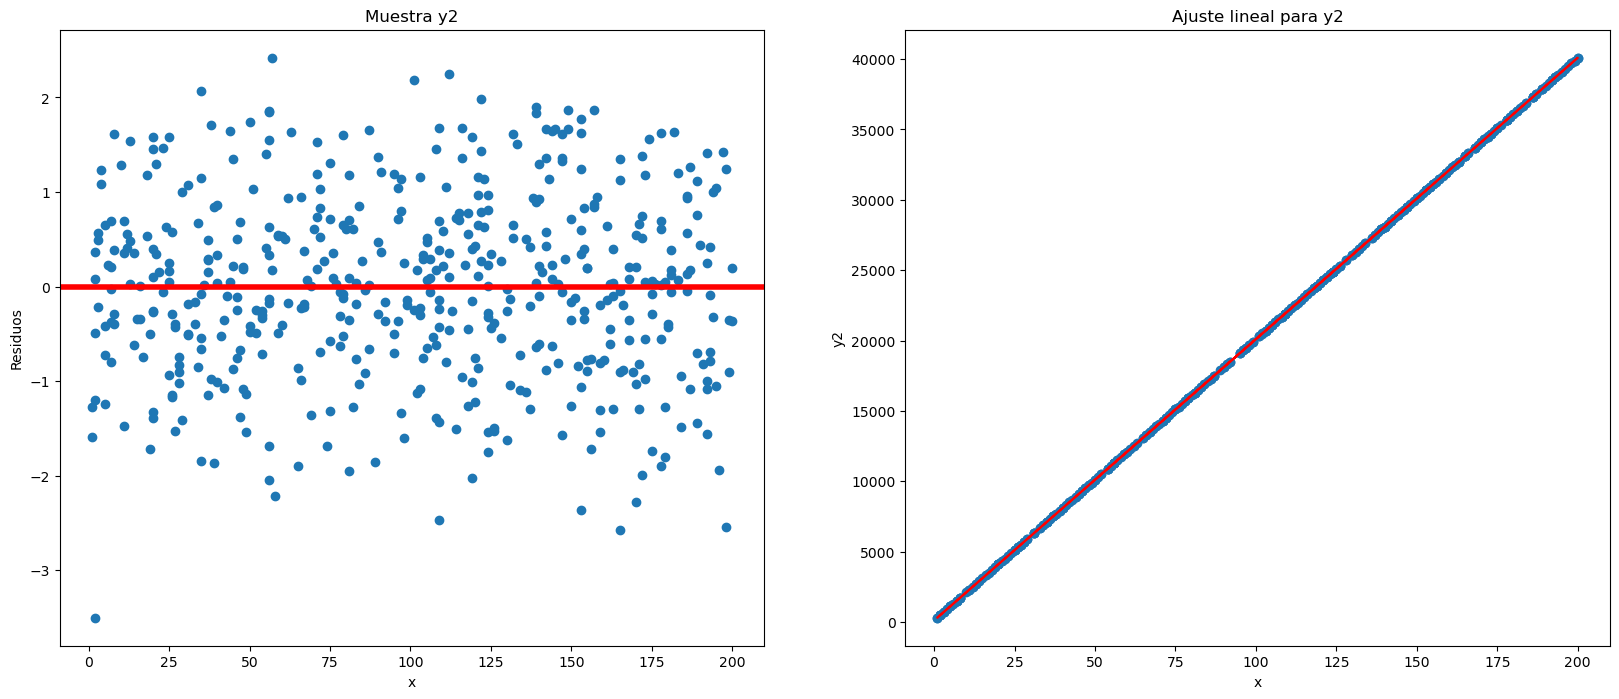

In [10]:
# Representación de los resultados para la muestra y2
plt.subplot(121)
plt.scatter(x, residuos2)
plt.axhline(0, color='red', linewidth=4) # Línea horizontal en residuos = 0
plt.xlabel('x')
plt.ylabel('Residuos')
plt.title('Muestra y2')

plt.subplot(122)
plt.plot(x,y2_pred,'r')
plt.scatter(x,y2)
plt.xlabel('x')
plt.ylabel('y2')
plt.title('Ajuste lineal para y2')

figure = plt.gcf()
figure.set_size_inches(20,8)
plt.show()

In [14]:
# Apartado b)
# La homocedasticidad de los datos también se puede comprobar mediante la prueba de Breusch - Pagan. Se requiere importar el módulo statsmodels.api,
# y el módulo statsmodels.stats.api.

import statsmodels.api as sm
import statsmodels.stats.api as sms

# Muestra y1
m1 = sm.OLS(y1, sm.add_constant(x)).fit() # m1.resid es un array con los residuos
bp1 = sms.het_breuschpagan(resid = m1.resid, exog_het = m1.model.exog)[1]
print('El p-valor de la prueba de Breusch - Pagan es:', bp1)

El p-valor de la prueba de Breusch - Pagan es: 5.379186026091337e-25


In [16]:
# Como p-valor < 0.05 se rechaza la hipótesis nula de homocedasticidad para la muestra y1. Este resultado es coherente con lo que se había obtenido
# previamente en el apartado a) mediante el test visual.

In [20]:
# Muestra y2
m2 = sm.OLS(y2, sm.add_constant(x)).fit() # m1.resid es un array con los residuos
bp2 = sms.het_breuschpagan(resid = m2.resid, exog_het = m2.model.exog)[1]
print('El p-valor de la prueba de Breusch - Pagan es:', bp2)

El p-valor de la prueba de Breusch - Pagan es: 0.3645547637921903


In [22]:
# Como p-valor > 0.05 se acepta la hipótesis nula de homocedasticidad de la muestra y2.

El p-valor de la prueba de Breusch - Pagan es: 4.747593174206424e-16


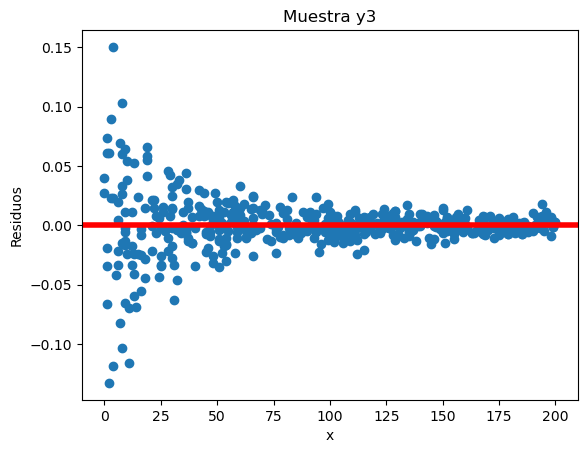

In [24]:
# Muestra y3
# Extra. Creamos una tercera muestra para poner de manifiesto que la dispersión de residuos también puede decrecer con x.
eps = np.random.normal(0,1,500)
x = np.random.randint(0,201,500)

y3 = 100 + 200 * x + eps/(10+x)
x = x.reshape((-1,1))
lm3 = linear_model.LinearRegression()
model3 = lm3.fit(x,y3) # Ajuste lineal
y3_pred = model3.predict(x) # Valores teóricos según el modelo
residuos3 = y3 - y3_pred
plt.scatter(x, residuos3)
plt.axhline(0, color='red', linewidth=4) # Línea horizontal en residuos = 0
plt.xlabel('x')
plt.ylabel('Residuos')
plt.title('Muestra y3')

m3 = sm.OLS(y3, sm.add_constant(x)).fit() # m1.resid es un array con los residuos
bp3 = sms.het_breuschpagan(resid = m3.resid, exog_het = m3.model.exog)[1]
print('El p-valor de la prueba de Breusch - Pagan es:', bp3)